<a href="https://colab.research.google.com/github/tacla/Sistemas-Inteligentes/blob/main/Clustering/K_MEANS_An%C3%A1lises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-MEANS: Análises

O objetivo é fazer a análise da qualidade dos agrupamentos gerados. Esta análise depende do número de clusters escolhidos. Para tal, vamos utilizar o método o cotovelo e a análise de silhueta.

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings

# Ignorar warnings para não poluir
warnings.filterwarnings("ignore")

# Dados da tabela
temp = [35,29,32,18,6,4,0,8,-3,10,9,10,26,20]
umid = [90,78,85,87,60,55,50,89,59,30,40,69,40,70]


dados = list(zip(temp, umid))
print(f"Pares (temperatura, umidade)")
print(f"{dados}")

Pares (temperatura, umidade)
[(35, 90), (29, 78), (32, 85), (18, 87), (6, 60), (4, 55), (0, 50), (8, 89), (-3, 59), (10, 30), (9, 40), (10, 69), (26, 40), (20, 70)]


Vamos rodar o K-Means variando o número de clusters.

In [2]:
k_range = range(1,11)
sse = []   # somatoria do erro quadratico
dif = 0
for k in k_range:
  km = KMeans(n_clusters=k, max_iter=20)
  km.fit(dados)
  sse.append(km.inertia_)
  if k > 1:
    dif = (sse[k-2] - sse[k-1])/sse[k-2]
  print(f"sse{k}: {km.inertia_:.3f} dif: {dif:.3f}")

sse1: 7074.857 dif: 0.000
sse2: 2449.429 dif: 0.654
sse3: 1365.233 dif: 0.443
sse4: 939.083 dif: 0.312
sse5: 552.583 dif: 0.412
sse6: 354.417 dif: 0.359
sse7: 280.750 dif: 0.208
sse8: 228.667 dif: 0.186
sse9: 178.167 dif: 0.221
sse10: 126.167 dif: 0.292


# Método do Cotovelo
Uma vez que o o KMeans foi executado para clusters com tamanhos 1 até 7, vamos ver a curva do erro (SSE). Parece que k=4 produz bom resultados.

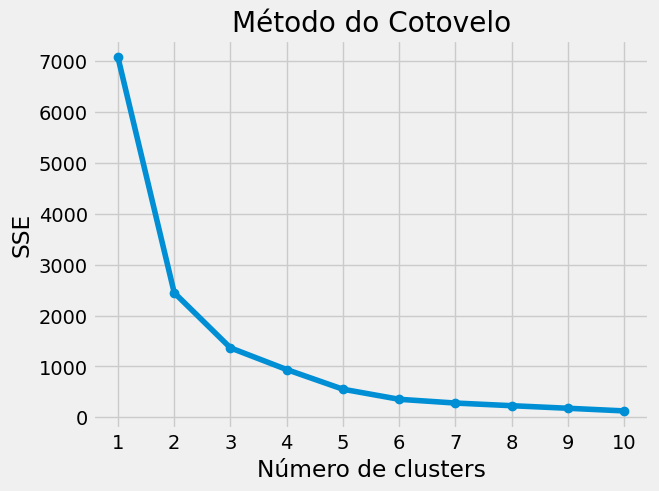

In [3]:
plt.style.use("fivethirtyeight")
plt.plot(k_range, sse, marker='o')
plt.title('Método do Cotovelo')
plt.xticks(k_range)
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

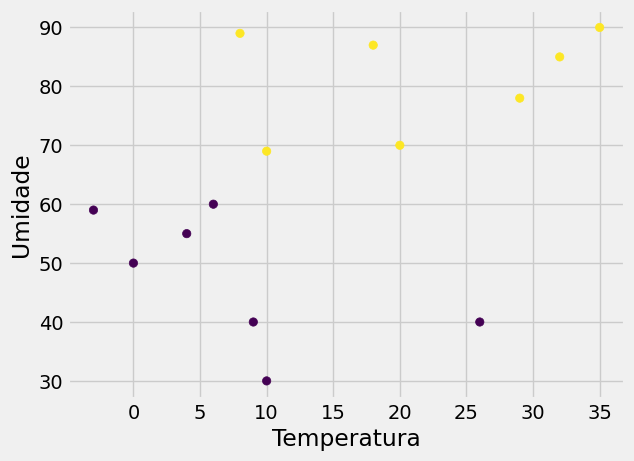

In [4]:
km = KMeans(n_clusters=4)
km.fit(dados)
plt.style.use("fivethirtyeight")
plt.scatter(temp, umid, c=km.labels_)
plt.xlabel("Temperatura")
plt.ylabel("Umidade")
plt.show()

# Análise de Silhueta
Vamos verificar se K=4 é realmente o melhor número de clusters. Para fazer a análise de silhueta necessitamos de no mínimo 2 clusters. Portanto, iniciamos com uma mudança no k-range.

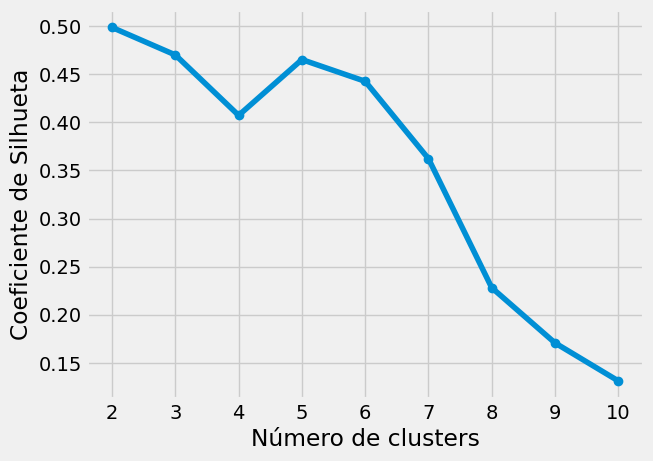

In [42]:
coefs = []
k_range2 = range(2, 11)

for k in k_range2:
  km = KMeans(n_clusters=k, max_iter=20)
  km.fit(dados)
  score = silhouette_score(dados, km.labels_)
  coefs.append(score)

plt.style.use("fivethirtyeight")
plt.plot(k_range2, coefs, marker='o')
plt.xticks(k_range2)
plt.xlabel("Número de clusters")
plt.ylabel("Coeficiente de Silhueta")
plt.show()

Qual a sua conclusão? Parece que k=2 produz um resultado melhor de coesão e de separação, não?

Para k = 2, temos uma média de coeficientes de silhueta = 0.5

Quanto mais próximo de 1, melhor a separação e a coesão.
Com isto pudemos observar que por vezes o método do cotovelo deixa dúvidas e precisamos utilizar outros recursos.

EXERCÍCIO: refaça o clustering com k=2.